In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_fscore_support, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC

pd.set_option('display.max_rows', 300)

## Data Importing

In [2]:
df = pd.read_csv("data_cleaned.csv", index_col=0)
df = df.sample(frac=1.0)
df

,A2M,ABCB1,ABL1,ADA,ADORA2A,AICDA,AIRE,AKT3,ALCAM,AMBP,...,POS_B,POS_C,POS_D,POS_E,POS_F,Disease,Gender,Race,Age,Size_cm
Patient,,,,,,,,,,,,,,,,,,,,,
922,7,11,7,13,20,7,13,18,5,8,...,15418,4798,1063,174,84,0,male,black/african american,54.0,NaN
113,4,8,16,13,9,9,10,26,3,14,...,13271,4531,996,146,69,1,female,white,74.0,1.3
1059,10,11,11,13,8,15,14,23,7,17,...,12372,4200,933,156,97,1,unknown/refused,unknown/refused,NaN,NaN
1564,19,40,37,63,35,24,39,102,25,28,...,19803,5602,1394,229,112,0,female,white,78.0,1.7
32,8,17,17,15,9,15,11,24,13,25,...,12093,4185,905,136,86,1,female,white,60.0,2.0
62,30,34,34,48,35,19,34,46,13,44,...,21481,6223,1531,271,118,1,male,white,64.0,1.4
454,10,13,38,30,14,14,8,52,14,37,...,12210,4206,949,182,71,1,unknown/refused,unknown/refused,NaN,NaN
1074,41,105,59,128,92,24,41,291,70,42,...,18815,5336,1278,256,96,1,female,white,79.0,1.5
178,10,16,26,9,11,15,10,33,19,10,...,14523,4786,1124,212,87,1,female,white,67.0,1.0


## Data Preparation: One-Hot Encoding

In [3]:
# transform categorical variables into multiple binary columns
dummiesGender = pd.get_dummies(df.Gender)
dummiesGender.columns = ["female", "male", "unknown/refused_gender"]

dummiesRace = pd.get_dummies(df.Race)
dummiesRace.columns = ["asian", "black/african american", "hispanic/latino", "unknown/refused_race", "white"]

In [4]:
# replace old categorical columns with new binary columns
df = pd.concat([df, dummiesGender, dummiesRace], axis=1)
df = df.drop(columns=["Gender", "Race"])
df

,A2M,ABCB1,ABL1,ADA,ADORA2A,AICDA,AIRE,AKT3,ALCAM,AMBP,...,Age,Size_cm,female,male,unknown/refused_gender,asian,black/african american,hispanic/latino,unknown/refused_race,white
Patient,,,,,,,,,,,,,,,,,,,,,
922,7,11,7,13,20,7,13,18,5,8,...,54.0,NaN,0,1,0,0,1,0,0,0
113,4,8,16,13,9,9,10,26,3,14,...,74.0,1.3,1,0,0,0,0,0,0,1
1059,10,11,11,13,8,15,14,23,7,17,...,NaN,NaN,0,0,1,0,0,0,1,0
1564,19,40,37,63,35,24,39,102,25,28,...,78.0,1.7,1,0,0,0,0,0,0,1
32,8,17,17,15,9,15,11,24,13,25,...,60.0,2.0,1,0,0,0,0,0,0,1
62,30,34,34,48,35,19,34,46,13,44,...,64.0,1.4,0,1,0,0,0,0,0,1
454,10,13,38,30,14,14,8,52,14,37,...,NaN,NaN,0,0,1,0,0,0,1,0
1074,41,105,59,128,92,24,41,291,70,42,...,79.0,1.5,1,0,0,0,0,0,0,1
178,10,16,26,9,11,15,10,33,19,10,...,67.0,1.0,1,0,0,0,0,0,0,1


## Data Preparation: Impute NaNs

In [5]:
# impute nan values with average of column
df.Age = df.Age.fillna(df.Age.mean()).round(0)
df.Size_cm = df.Size_cm.fillna(df.Size_cm.mean()).round(1)

df

,A2M,ABCB1,ABL1,ADA,ADORA2A,AICDA,AIRE,AKT3,ALCAM,AMBP,...,Age,Size_cm,female,male,unknown/refused_gender,asian,black/african american,hispanic/latino,unknown/refused_race,white
Patient,,,,,,,,,,,,,,,,,,,,,
922,7,11,7,13,20,7,13,18,5,8,...,54.0,1.9,0,1,0,0,1,0,0,0
113,4,8,16,13,9,9,10,26,3,14,...,74.0,1.3,1,0,0,0,0,0,0,1
1059,10,11,11,13,8,15,14,23,7,17,...,67.0,1.9,0,0,1,0,0,0,1,0
1564,19,40,37,63,35,24,39,102,25,28,...,78.0,1.7,1,0,0,0,0,0,0,1
32,8,17,17,15,9,15,11,24,13,25,...,60.0,2.0,1,0,0,0,0,0,0,1
62,30,34,34,48,35,19,34,46,13,44,...,64.0,1.4,0,1,0,0,0,0,0,1
454,10,13,38,30,14,14,8,52,14,37,...,67.0,1.9,0,0,1,0,0,0,1,0
1074,41,105,59,128,92,24,41,291,70,42,...,79.0,1.5,1,0,0,0,0,0,0,1
178,10,16,26,9,11,15,10,33,19,10,...,67.0,1.0,1,0,0,0,0,0,0,1


## Data Splitting and Scaling

In [6]:
X = df.drop(columns=["Disease"])
y = df.Disease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
# large test size fraction because otherwise it's too small to get consistent testing results

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/home/zaned/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/zaned/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/zaned/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## Cross-Validation for Hyperparameter Optimization

In [8]:
lr = [
    LogisticRegression(solver="lbfgs")
]

knn = [
    KNeighborsClassifier(n_neighbors=n) for n in range(3, 11, 2)  # best == 5
]

dt = [
    DecisionTreeClassifier(max_depth=d) for d in range(5, 17, 2)  # all bad
]

rf = [
    RandomForestClassifier(max_depth=d, n_estimators=5) for d in range(5, 17, 2)  # best == 5, 5
] + [
    RandomForestClassifier(max_depth=d, n_estimators=10) for d in range(5, 17, 2)
]

nn = [
    MLPClassifier(solver="lbfgs", hidden_layer_sizes=(100,)),  # best
    MLPClassifier(solver="lbfgs", hidden_layer_sizes=(100, 100)),
    MLPClassifier(solver="lbfgs", hidden_layer_sizes=(100, 100, 100)),
    MLPClassifier(solver="lbfgs", hidden_layer_sizes=(100, 100, 100, 100)),
]

svm = [
    LinearSVC()
]

models = lr + knn + dt + rf + nn + svm

for i in range(len(models)):
    print(i, "\t", models[i])
    print()

0 	 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

1 	 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

2 	 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

3 	 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

4 	 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

5 	 DecisionTreeClassifier(class_weight=No

In [9]:
rows = []

i = 0
for model in models:
    print(i)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=10)
    mean = np.mean(scores)
    #median = np.median(scores)
    rows.append([str(model), mean])
    
    i += 1
    
cv_df = pd.DataFrame(rows, columns=["Model", "Accuracy"])
cv_df.sort_values(by="Accuracy", ascending=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


,Model,Accuracy
27,"LinearSVC(C=1.0, class_weight=None, dual=True,...",0.900000
23,"MLPClassifier(activation='relu', alpha=0.0001,...",0.885714
18,"RandomForestClassifier(bootstrap=True, class_w...",0.885714
24,"MLPClassifier(activation='relu', alpha=0.0001,...",0.885714
11,"RandomForestClassifier(bootstrap=True, class_w...",0.885714
10,"DecisionTreeClassifier(class_weight=None, crit...",0.857143
26,"MLPClassifier(activation='relu', alpha=0.0001,...",0.857143
25,"MLPClassifier(activation='relu', alpha=0.0001,...",0.857143
20,"RandomForestClassifier(bootstrap=True, class_w...",0.857143
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.857143


## Final Tests

In [10]:
# best version of each model

bestModels = [
    models[0],  # log reg
    models[23],  # neural net
    models[11],  # random forest
    models[2],  # KNN
    models[5],  # decision tree
    models[27]  # SVM
]

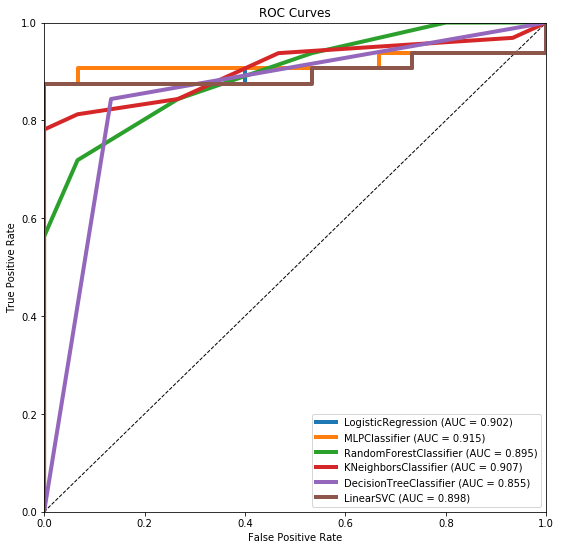

In [11]:
plt.figure(figsize=(9, 9))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

for model in bestModels:
    model.fit(X_train_scaled, y_train)
    try:
        y_prob = model.predict_proba(X_test_scaled)[:,1]
    except:
        y_prob = model.decision_function(X_test_scaled)
        #print(y_prob)
        #break
    
    fpr, tpr, _ = roc_curve(y_test, y_prob, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=4, label="{} (AUC = {})".format(str(model)[:str(model).find("(")], roc_auc.round(3)))

plt.legend(loc="lower right")
plt.show()

#### Selection of best model by AUC is difficult because the small sample size creates jerky and overlapping curves, so we will try measuring accuracy, precision, recall, and precision-recall f1 directly.

In [12]:
rows = []
for model in bestModels:
    model.fit(X_train_scaled, y_train)  
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    prec, rec, fm, _ = precision_recall_fscore_support(y_test, y_pred, pos_label=1, average="binary")
    
    rows.append([str(model), acc, prec, rec, fm])

final_df = pd.DataFrame(rows, columns=["Model", "Accuracy", "Precision", "Recall", "F-Measure"])
final_df.sort_values(by="F-Measure", ascending=False)

,Model,Accuracy,Precision,Recall,F-Measure
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.914894,1.000000,0.87500,0.933333
1,"MLPClassifier(activation='relu', alpha=0.0001,...",0.893617,0.965517,0.87500,0.918033
5,"LinearSVC(C=1.0, class_weight=None, dual=True,...",0.893617,1.000000,0.84375,0.915254
3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.808511,0.870968,0.84375,0.857143
2,"RandomForestClassifier(bootstrap=True, class_w...",0.787234,0.823529,0.87500,0.848485
4,"DecisionTreeClassifier(class_weight=None, crit...",0.787234,0.843750,0.84375,0.843750


#### Once again, the results are too close to call and are subject to drastic change by the random selection of the test set

## Learning Curve

In [13]:
X_train_scaled.shape

(70, 794)

In [14]:
f1s = {}
for model in bestModels:
    mName = str(model)[:str(model).find("(")]
    f1s[mName] = []
    
    for n in range(10, 71, 2):
        xt = X_train_scaled[:n]
        yt = y_train[:n]
        
        model.fit(xt, yt)
        y_pred = model.predict(X_test_scaled)
        
        f1 = f1_score(y_test, y_pred)
        f1s[mName].append(f1)

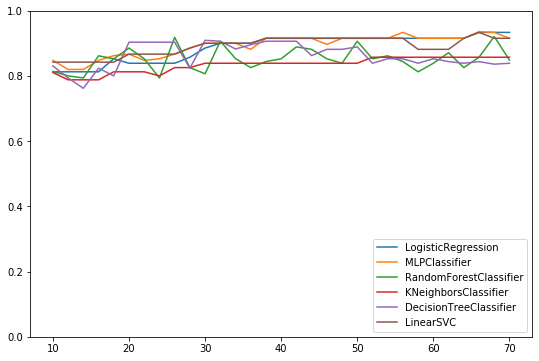

In [15]:
# zoomed out
plt.figure(figsize=(9, 6))
plt.ylim([0.0, 1.0])

for model in bestModels:
    mName = str(model)[:str(model).find("(")]
    plt.plot(range(10, 71, 2), f1s[mName], label=mName)

plt.legend(loc="lower right")
plt.show()

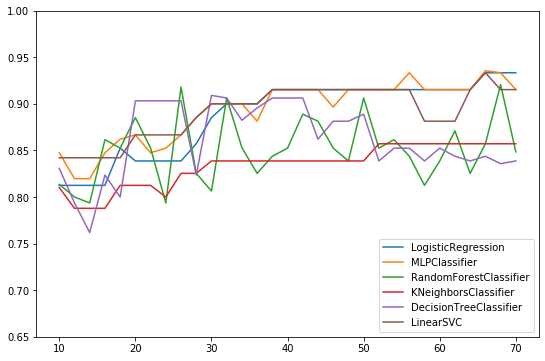

In [16]:
# zoomed in
plt.figure(figsize=(9, 6))
plt.ylim([0.65, 1.0])

for model in bestModels:
    mName = str(model)[:str(model).find("(")]
    plt.plot(range(10, 71, 2), f1s[mName], label=mName)

plt.legend(loc="lower right")
plt.show()